## Business Understanding

### Introduction:
Social Buzz was founded by two former engineers from a large social media conglomerate, one
from London and the other from San Francisco. They left in 2008 and both met in San
Francisco to start their business. They started Social Buzz because they saw an opportunity to
build on the foundation that their previous company started by creating a new platform where
content took center stage. Social Buzz emphasizes content by keeping all users anonymous,
only tracking user reactions on every piece of content.

Over the past 5 years, Social Buzz has reached over 500 million active users each month.
They have scaled quicker than anticipated and need the help of an advisory firm to oversee
their scaling process effectively.

### Problem Statement:
Due to their rapid growth and digital nature of their core product, the amount of data that they
create, collect and must analyze is huge. Every day over **100,000** pieces of content, ranging
from text, images, videos and GIFs are posted. All of this data is highly unstructured and
requires extremely sophisticated and expensive technology to manage and maintain.

### Project Objective(s):
Social Buzz is a fast growing technology unicorn that need to adapt quickly to its scale.

Accenture has begun a 3 month POC focusing on these tasks:

*   An audit of Social Buzz's big data practice.

*   Recommendation for a successful IPO.

*   Analysis to find Social Buzz's **top 5 most popular categories** of comtent.

## Data Understanding

In [2]:
# Import require packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Read data from csv files in drive into dataframes
contents = pd.read_csv('/content/drive/MyDrive/Forage Virtual Internships/Accenture/Content.csv')
reactions = pd.read_csv('/content/drive/MyDrive/Forage Virtual Internships/Accenture/Reactions.csv')
reaction_types = pd.read_csv('/content/drive/MyDrive/Forage Virtual Internships/Accenture/ReactionTypes.csv')

In [5]:
# Display the first 5 rows of each dataframe
display(contents.head())
display(reactions.head())
display(reaction_types.head())

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [6]:
# Check the number of rows and columns in each dataframe
print(contents.shape)
print(reactions.shape)
print(reaction_types.shape)

(1000, 6)
(25553, 5)
(16, 4)


In [7]:
# Check the data types of each column in each dataframe
print(contents.dtypes, '\n')
print(reactions.dtypes, '\n')
print(reaction_types.dtypes)

Unnamed: 0     int64
Content ID    object
User ID       object
Type          object
Category      object
URL           object
dtype: object 

Unnamed: 0     int64
Content ID    object
User ID       object
Type          object
Datetime      object
dtype: object 

Unnamed: 0     int64
Type          object
Sentiment     object
Score          int64
dtype: object


In [8]:
# Check the unique values in the Category and Type columns of the contents dataframe.
print(contents['Category'].unique(), '\n')
print(contents['Type'].unique())

['Studying' 'healthy eating' 'technology' 'food' 'cooking' 'dogs' 'soccer'
 'public speaking' 'science' 'tennis' 'travel' 'fitness' 'education'
 'studying' 'veganism' 'Animals' 'animals' 'culture' '"culture"' 'Fitness'
 '"studying"' 'Veganism' '"animals"' 'Travel' '"soccer"' 'Education'
 '"dogs"' 'Technology' 'Soccer' '"tennis"' 'Culture' '"food"' 'Food'
 '"technology"' 'Healthy Eating' '"cooking"' 'Science' '"public speaking"'
 '"veganism"' 'Public Speaking' '"science"'] 

['photo' 'video' 'GIF' 'audio']


In [9]:
# Check the unique values in the Type column of the reactions dataframe.
print(reactions['Type'].unique())

[nan 'disgust' 'dislike' 'scared' 'interested' 'peeking' 'cherish' 'hate'
 'love' 'indifferent' 'super love' 'intrigued' 'worried' 'like' 'heart'
 'want' 'adore']


In [10]:
# Check the unique values in the Type and Sentiment columns of the reaction_types dataframe.
print(reaction_types['Type'].unique(), '\n')
print(reaction_types['Sentiment'].unique())

['heart' 'want' 'disgust' 'hate' 'interested' 'indifferent' 'love'
 'super love' 'cherish' 'adore' 'like' 'dislike' 'intrigued' 'peeking'
 'scared' 'worried'] 

['positive' 'negative' 'neutral']


In [11]:
# Check for missing values
print(contents.isnull().sum(), '\n')
print(reactions.isnull().sum(), '\n')
print(reaction_types.isnull().sum())

Unnamed: 0      0
Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64 

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64 

Unnamed: 0    0
Type          0
Sentiment     0
Score         0
dtype: int64


### Inference:

*   Some of the values in the **`Category`** column of the **`contents`** dataframe have double quotes while some begins with lower case and others in upper case. These needs to be regularized.

*   The values in the **`Type`** column of the **`contents`** dataframe is different from the **`Type`** column in both the **`reactions`** and **`reaction_type`** dataframes. Hence, renamimg this columns in their respective dataframe is required.

*   The **`Datetime`** column in the **`reactions`** dataframe has an object type instead of datetime.

*   There are missing values in the **`Reaction Type`** column of the **`reactions`** dataframe.



## Data Cleaning

### Task2.
The brief carefully states that the client wanted to see “An **analysis** of their **content categories** showing the **top 5** categories with the largest popularity”.

*   As explained in the data model, popularity is quantified by the “Score” given to each reaction type.

*   We therefore need data showing the content ID, category, content type, reaction type, and reaction score.

*   So, to figure out popularity, we’ll have to add up which content categories have the largest score.

### Data Cleaning Steps.

*   removing rows that have values which are missing,

*   changing the data type of some values within a column, and

*   removing columns which are not relevant to this task.


*   **Remove columns which are not relevant to this task.**

Since the client wants to see “An analysis of their content categories showing the top 5 categories with the largest popularity”, the following fields will not be required:

1. **`Unnamed: 0`**

2. **`User ID`**

3. **`URL`**

In [12]:
# Drop the columns mentioned above.
drop_columns = ['Unnamed: 0', 'User ID', 'URL']
for col in drop_columns:
  if col in contents.columns:
    contents.drop(col, axis=1, inplace=True)
  if col in reactions.columns:
    reactions.drop(col, axis=1, inplace=True)
  if col in reaction_types.columns:
    reaction_types.drop(col, axis=1, inplace=True)

In [13]:
# Check if columns have been dropped.
print(contents.columns, '\n')
print(reactions.columns, '\n')
print(reaction_types.columns)

Index(['Content ID', 'Type', 'Category'], dtype='object') 

Index(['Content ID', 'Type', 'Datetime'], dtype='object') 

Index(['Type', 'Sentiment', 'Score'], dtype='object')


In [14]:
# Rename the Type column of the contents dataframe to Content Type.
contents.rename(columns={'Type': 'Content Type'}, inplace=True)

# Rename the Type column of the reactions dataframe to Reaction Type.
reactions.rename(columns={'Type': 'Reaction Type'}, inplace=True)

# Rename the Type column of the reaction_types dataframe to Reaction Type.
reaction_types.rename(columns={'Type': 'Reaction Type'}, inplace=True)

In [15]:
# Remove double quotes from the values in the Category column of the content dataframe.
contents['Category'] = contents['Category'].str.replace('"', '')

# Convert the values in the Category column of the contents dataframe to lower case.
contents['Category'] = contents['Category'].str.lower()

# Print the unique values in the Category columns.
print(contents['Category'].unique())

['studying' 'healthy eating' 'technology' 'food' 'cooking' 'dogs' 'soccer'
 'public speaking' 'science' 'tennis' 'travel' 'fitness' 'education'
 'veganism' 'animals' 'culture']



*   **Remove rows that have values which are missing**

In [16]:
# Remove missing values in the Type column of the reactions dataframe.
reactions.dropna(subset=['Reaction Type'], inplace=True)

In [17]:
# Check missing values again.
print(reactions.isnull().sum())

Content ID       0
Reaction Type    0
Datetime         0
dtype: int64


*   **Change the data type of some values within a column.**

In [18]:
# Change the data type of the datetime column in the reactions dataframe from object to datetime.
reactions['Datetime'] = pd.to_datetime(reactions['Datetime'])

## Data Modelling

*    Create a final data set by merging the three tables together using the Reaction table as the base table, then first join the relevant columns from the Content data set, and then the Reaction Types data set.

In [19]:
# Use the pd.merge function to join the three tables.
reactions_contents = pd.merge(reactions, contents, on='Content ID')
reactions_contents_reaction_types = pd.merge(reactions_contents, reaction_types, on='Reaction Type')
reactions_contents_reaction_types.head()

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,studying,positive,30


## Data Analysis
*   Determine the Top 5 performing categories by adding up the total scores for each category.

In [20]:
# Determine the Top 5 categories by adding up the total scores for each category.
top_5_performing_categories = \
reactions_contents_reaction_types.groupby('Category')['Score'].sum().sort_values(ascending=False).head().reset_index()
top_5_performing_categories

,Category,Score
0,animals,74965
1,science,71168
2,healthy eating,69339
3,technology,68738
4,food,66676


In [21]:
# Generate a CSV file with the top 5 performing categories.
top_5_performing_categories.to_csv('top_5_performing_categories.csv', index=False)

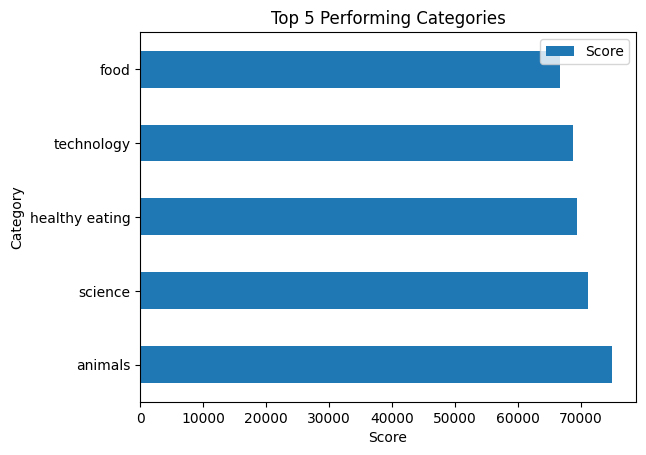

In [22]:
# Plot graph of top 5 performing categories.
top_5_performing_categories.plot(kind='barh', x='Category', y='Score', title='Top 5 Performing Categories')
plt.xlabel('Score')
plt.ylabel('Category')
plt.show()

Inference:


### Task 3.

*   How many unique categories are there?

*   How many reactions are there to the most popular category?

*   What was the month with the most posts?


*   **How many unique categories are there?**

In [23]:
total_unique_cat = len(reactions_contents_reaction_types['Category'].unique())
print(f'There are {total_unique_cat} unique categories.')

There are 16 unique categories.


*   **How many reactions are there to the most popular category?**

In [24]:
most_popular_category = \
reactions_contents_reaction_types.groupby('Category')['Reaction Type'].count().sort_values(ascending=False).head(1).reset_index()
total_reactions_count = most_popular_category['Reaction Type'][0]
print(f'There are {total_reactions_count} reactions to the most popular category.')

There are 1897 reactions to the most popular category.


*   **What was the month with the most posts?**

In [25]:
# Create a month column in the reactions_contents_reaction_types dataframe.
reactions_contents_reaction_types['Month'] = reactions_contents_reaction_types['Datetime'].dt.month

# Create a dictionary of month names.
month_dict = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",\
    7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}

# Map month dictionary to the Month column.
reactions_contents_reaction_types['Month'] = reactions_contents_reaction_types['Month'].map(month_dict)

# count month with the most posts.
month_with_most_posts = reactions_contents_reaction_types['Month'].value_counts().head(1).reset_index()

print(f'The month with the most posts is {month_with_most_posts["Month"][0]} and it has {month_with_most_posts["count"][0]} posts.')


The month with the most posts is May and it has 2138 posts.


## Summary
In this simulation the following activities were performed:

1.   Data Understanding

  *   importing of packages
  *   loading data sets into pandas dataframes
  *   exploration of datasets

2.   Data Cleaning

  *   removing rows with missing values
  *   removing irrelevant columns
  *   fixing data type mismatch
  *   renaming columns for better understanding

3.   Data Modeling

  *   merging of multiple datasets to obtain a final data set

4.   Data Analysis

  *   determine the Top 5 performing categories
  *   determine number of unique categories
  *   determine number of reactions of the most popular category
  *   determine the month of the most posts

## Conclusion

### 🔍 Insights

> From ur analysis, we can see that the top 5 most popular categories of posts were animals, science, healthy eating, technology and food in descending order. Animals and Science are the two most popular categories of content, showing that people enjoy 'real-life' and 'factual' content the most.
Food is a common theme within the top 5 categories with 'Healthy Eating' ranking higher. This could be a signal to
show the types of people that are using your platform, and you could use this insight to boost engagement even further.

### Recommendations
> You can create a targeted campaign with content focused on this category or work with healthy eating brands to promote content and boost user engagement.





